In [ ]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 622.2 kB/s eta 0:00:00


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Youtube_Video_Dataset.csv to Youtube_Video_Dataset.csv


In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Youtube_Video_Dataset.csv']))
print(df)

                                                   Title  \
0      Madagascar Street Food!!! Super RARE Malagasy ...   
1                42 Foods You Need To Eat Before You Die   
2                    Gordon Ramsay’s Top 5 Indian Dishes   
3            How To Use Chopsticks - In About A Minute 🍜   
4                           Trying Indian Food 1st Time!   
...                                                  ...   
11206  art journal | shimmer sprays, stencils, collag...   
11207                   Ar-Tea Collage * Mixed Media Art   
11208  DIY Mixed Media Art Collage Greeting Cards / M...   
11209  Art Collage Process DecoJournal using Rice Pap...   
11210  Journal Collage Process using Magazine Cut Out...   

                   Videourl   Category  \
0      /watch?v=EwBA1fOQ96c       Food   
1      /watch?v=0SPwwpruGIA       Food   
2      /watch?v=upfu5nQB2ks       Food   
3      /watch?v=xFRzzSF_6gk       Food   
4      /watch?v=K79bXtaRwcM       Food   
...                     ...

In [ ]:
df['Videourl'] = 'https://' + df['Videourl'].astype(str)

In [ ]:
df = df.sample(n=375,axis='rows')

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('sample.csv')

In [ ]:
files.download('sample.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['Youtube_Video_Dataset.csv']))
print(df)

                                                   Title  \
0      Madagascar Street Food!!! Super RARE Malagasy ...   
1                42 Foods You Need To Eat Before You Die   
2                    Gordon Ramsay’s Top 5 Indian Dishes   
3            How To Use Chopsticks - In About A Minute 🍜   
4                           Trying Indian Food 1st Time!   
...                                                  ...   
11206  art journal | shimmer sprays, stencils, collag...   
11207                   Ar-Tea Collage * Mixed Media Art   
11208  DIY Mixed Media Art Collage Greeting Cards / M...   
11209  Art Collage Process DecoJournal using Rice Pap...   
11210  Journal Collage Process using Magazine Cut Out...   

                   Videourl   Category  \
0      /watch?v=EwBA1fOQ96c       Food   
1      /watch?v=0SPwwpruGIA       Food   
2      /watch?v=upfu5nQB2ks       Food   
3      /watch?v=xFRzzSF_6gk       Food   
4      /watch?v=K79bXtaRwcM       Food   
...                     ...

In [ ]:
df['Videourl'] = 'https://www.youtube.com' + df['Videourl'].astype(str)

In [ ]:
df = df.sample(n=475,axis='rows')

In [ ]:
print(df)

                                                  Title  \
5693  ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi In...   
5738  208 വർഷം പഴക്കമുള്ള ബ്രിട്ടീഷുകാർ പണിത കണ്ണൂരി...   
1420  RARE 100 STREET FOODS | RARE FOODS ALL AROUND ...   
6931  Manali to Rohtang Pass by Road Full Video - Pa...   
6187               MI VIAJE A PARÍS | ALEXANDRA PEREIRA   
...                                                 ...   
1238     Thai Green Curry Chicken Recipe (แกงเขียวหวาน)   
5034       The History of the British Isles: Every Year   
391                            EVERY FOOD DELIVERY EVER   
3338       Contract Electronics Manufacturing, CEM, EMS   
4508   History of China # 02 | What was Boxer Rebellion   

                                         Videourl       Category  \
5693  https://www.youtube.com/watch?v=sbHYTdGGMIA    travel blog   
5738  https://www.youtube.com/watch?v=RfJFQLDh49s    travel blog   
1420  https://www.youtube.com/watch?v=xsNrmifRK-c           Food   
6931  https://www.y

In [ ]:
from pytube import YouTube


# Define the output directory for the downloaded videos
output_dir = '/content/drive/MyDrive/ytvideos/'

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Get the YouTube video URL from the second column of the CSV file
    url = row[1]
    try:
        # Create a YouTube object for the video
        yt = YouTube(url)

        # Get the highest resolution stream
        stream = yt.streams.get_highest_resolution()

        # Define the output file path
        output_path = output_dir + row[0] + '.mp4'

        # Download the video
        stream.download(output_path)

        print(f"{row[0]} downloaded successfully.")

    except Exception as e:
        print(f"{row[0]} could not be downloaded. Error: {str(e)}")

ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters downloaded successfully.
208 വർഷം പഴക്കമുള്ള ബ്രിട്ടീഷുകാർ പണിത കണ്ണൂരിലെ ഒരു പള്ളി - CSI English Church Kannur could not be downloaded. Error: 'streamingData'
RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food downloaded successfully.
Manali to Rohtang Pass by Road Full Video - Part 2 downloaded successfully.
MI VIAJE A PARÍS | ALEXANDRA PEREIRA downloaded successfully.
International Street Foods Documentary - Street Food From Around The World - Documentary Channel could not be downloaded. Error: 2lt6lCglA1w is unavailable
UDAIPUR 😍 - my favourite city could not be downloaded. Error: uDnKYSAV8QQ is a private video
TOP 7 PLACES TO VISIT IN MELAKA CITY │Travel Malaysia Guide could not be downloaded. Error: 'streamingData'
Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker downloaded successfully.
Parunthumpara Video do

In [ ]:
import cv2
import os
import glob
import concurrent.futures

def extract_frames(video_path, save_path, fps):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        if count % fps == 0:
            cv2.imwrite(os.path.join(save_path, 'frame{:04d}.jpg'.format(count)), image)
        success, image = vidcap.read()
        count += 1

def process_video(video_dir):
    video_file = glob.glob(os.path.join(video_dir, '*.mp4'))[0]
    save_dir = os.path.join(video_dir, 'frames')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    try:
        fps = int(cv2.VideoCapture(video_file).get(cv2.CAP_PROP_FPS))
        extract_frames(video_file, save_dir, fps)
        print(f'{video_file} done')
    except Exception as e:
        print(f'{video_file} failed: {e}')

if __name__ == '__main__':
    videos_dir = '/content/drive/MyDrive/ytvideos'
    video_dirs = [os.path.join(videos_dir, d) for d in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, d))]
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(process_video, dir) for dir in video_dirs]
        for future in concurrent.futures.as_completed(futures):
            pass


KeyboardInterrupt: ignored

In [ ]:
import cv2
import os
import glob
import concurrent.futures

def extract_frames(video_path, save_path, fps):
    vidcap = cv2.VideoCapture(video_path)
    success, image = vidcap.read()
    count = 0
    while success:
        if count % fps == 0:
            cv2.imwrite(os.path.join(save_path, 'frame{:04d}.jpg'.format(count)), image)
        success, image = vidcap.read()
        count += 1

def process_video(video_dir):
    video_file = glob.glob(os.path.join(video_dir, '*.mp4'))[0]
    save_dir = os.path.join(video_dir, 'frames')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    try:
        fps = int(cv2.VideoCapture(video_file).get(cv2.CAP_PROP_FPS))
        extract_frames(video_file, save_dir, fps)
        print(f'{video_file} done')
    except Exception as e:
        print(f'{video_file} failed: {e}')

if __name__ == '__main__':
    videos_dir = '/content/drive/MyDrive/ytvideos'
    video_dirs = [os.path.join(videos_dir, d) for d in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, d))]
    
    with concurrent.futures.ProcessPoolExecutor() as executor:
        futures = [executor.submit(process_video, dir) for dir in video_dirs]
        for future in concurrent.futures.as_completed(futures):
            try:
                future.result()
            except Exception as e:
                print(f'Exception: {e}')
    print('All videos processed')


/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4 done
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/Manali to Rohtang Pass by Road Full Video - Part 2.mp4 done
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/MI VIAJE A PARÍS  ALEXANDRA PEREIRA.mp4 done
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/Future Manufacturing 40 Toyota innovation robotics AI Big Data Futurist keynote speaker.mp4 done
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/RARE 100 STREET FOODS  RARE FOODS ALL AROUND THE WORLD  PART 1  INDIAN STREET FOODS .mp4 done
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/Parunthumpara Vi

KeyboardInterrupt: ignored

In [2]:
import os
import shutil


In [ ]:
import cv2
import os
import glob
import concurrent.futures


In [3]:
videos_dir = '/content/drive/MyDrive/ytvideos'


video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]


for folder in video_folders:
    subdirs = [d for d in os.listdir(os.path.join(videos_dir, folder)) if os.path.isdir(os.path.join(videos_dir, folder, d))]
    for subdir in subdirs:
        if subdir != 'frames':
            subdir_path = os.path.join(videos_dir, folder, subdir)
            if not os.listdir(subdir_path):
                shutil.rmtree(subdir_path)
                print(f'{subdir_path} deleted')
            else:
                print(f'{subdir_path} contains files and will not be deleted')

/content/drive/MyDrive/ytvideos/TGT;PGT ART/degree college u k question paper, kvs art education preperetion..mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/WHAT I WORE IN UDAIPUR / Travel Lookbook- Udaipur.mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/Tricks How to Hide/Show your History | Mobile Legends: Bang Bang.mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/ഒമാൻ യാത്രാ വ്ലോഗ് - Tech Travel Eat from Kochi to Oman/Muscat.mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/Drunk History vol. 6 w/ John C. Reilly & Crispin Glover.mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/NTPC/SSC  contains files and will not be deleted
/content/drive/MyDrive/ytvideos/Who can Apply for Bachelor of Fine Arts Degree/How to Apply for Bachelor of Fine Arts Degree.mp4 contains files and will not be deleted
/content/drive/MyDrive/ytvideos/History of Rome/Italy.mp4 conta

In [4]:
import os

# Define the path to the videos directory
videos_dir = '/content/drive/MyDrive/ytvideos'

# Get a list of video folders within the videos directory
video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]

# Check if each video folder has a frames subdirectory that is not empty
for folder in video_folders:
    frames_dir = os.path.join(videos_dir, folder, 'frames')
    if os.path.exists(frames_dir):
        if os.listdir(frames_dir):
            print(f'{frames_dir} exists and is not empty')
        else:
            print(f'{frames_dir} exists but is empty')
    else:
        print(f'{frames_dir} does not exist')

/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Why We Love Seeing Other People Fail.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Super Flaky Scallion Pancake - Taipei Taiwan 天津葱抓餅.mp4/frames exists and is not

In [7]:
import os
import shutil

# Define the path to the videos directory
videos_dir = '/content/drive/MyDrive/ytvideos'

# Get a list of video folders within the videos directory
video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]

# Check if each video folder has a frames subdirectory that is not empty
for folder in video_folders:
    frames_dir = os.path.join(videos_dir, folder, 'frames')
    if os.path.exists(frames_dir):
        if os.listdir(frames_dir):
            print(f'{frames_dir} exists and is not empty')
        else:
            print(f'{frames_dir} exists but is empty')
    else:
        print(f'{frames_dir} does not exist')
        # Delete the folder that does not have a frames subdirectory
        shutil.rmtree(os.path.join(videos_dir, folder))
        print(f'{folder} has been deleted')

/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Why We Love Seeing Other People Fail.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Super Flaky Scallion Pancake - Taipei Taiwan 天津葱抓餅.mp4/frames exists and is not

In [8]:
import os
import shutil

# Define the path to the videos directory
videos_dir = '/content/drive/MyDrive/ytvideos'

# Get a list of video folders within the videos directory
video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]

# Check if each video folder has a frames subdirectory that is not empty
for folder in video_folders:
    frames_dir = os.path.join(videos_dir, folder, 'frames')
    if os.path.exists(frames_dir):
        if os.listdir(frames_dir):
            print(f'{frames_dir} exists and is not empty')
        else:
            print(f'{frames_dir} exists but is empty')
            # Delete the folder that has an empty frames subdirectory
            shutil.rmtree(os.path.join(videos_dir, folder))
            print(f'{folder} has been deleted')
    else:
        print(f'{frames_dir} does not exist')
        # Delete the folder that does not have a frames subdirectory
        shutil.rmtree(os.path.join(videos_dir, folder))
        print(f'{folder} has been deleted')

/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Why We Love Seeing Other People Fail.mp4/frames exists and is not empty
/content/drive/MyDrive/ytvideos/Super Flaky Scallion Pancake - Taipei Taiwan 天津葱抓餅.mp4/frames exists and is not

In [23]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ptzkbpiy
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ptzkbpiy
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369398 sha256=c370aed5d4b612b2c19ef2121d080a656e5fbbab0f33b7faeafa0439c7b6af70
  Stored in directory: /tmp/pip-ephem-wheel-cache-qu8_0k3k/wheels/c8/e4/e1/11374c111387672fc2068dfbe0d4b424cb9cdd1b2e184a71b5
Successfully built clip


In [13]:
import torch
import clip
import os
import cv2
from PIL import Image
from torchvision import transforms

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device=device)

# Define the path to the directory containing the videos
videos_path = '/content/drive/MyDrive/ytvideos'

# Define the transform to be applied to each image
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    preprocess
])

# Loop through each subdirectory in the videos directory
for subdir in os.listdir(videos_path):
    subdir_path = os.path.join(videos_path, subdir)
    # Check if the subdirectory is itself a directory
    if os.path.isdir(subdir_path):
        frames_path = os.path.join(subdir_path, 'frames')
        # Check if the "frames" directory exists and is not empty
        if os.path.exists(frames_path) and os.path.isdir(frames_path) and os.listdir(frames_path):
            # Create a new directory for the encoded images
            encoded_path = os.path.join(subdir_path, 'encoded')
            os.makedirs(encoded_path, exist_ok=True)
            print(f"Encoding frames for video {subdir}...")
            # Loop through each image in the "frames" directory
            for image_file in os.listdir(frames_path):
                image_path = os.path.join(frames_path, image_file)
                # Check if the file is actually an image and not another directory
                if os.path.isfile(image_path) and image_path.endswith('.jpg'):
                    # Open the image file and apply the transform
                    with open(image_path, 'rb') as f:
                        image = Image.open(f).convert('RGB')
                    image = transform(image).unsqueeze(0).to(device)
                    # Encode the image using the CLIP model
                    with torch.no_grad():
                        features = model.encode_image(image).cpu().numpy()
                    # Save the encoded features as a numpy file
                    np.save(os.path.join(encoded_path, f'{image_file}.npy'), features)
            print(f"Finished encoding frames for video {subdir}.")
        else:
            print(f"Directory {frames_path} does not exist or is empty.")
    else:
        print(f"Path {subdir_path} is not a directory.")

KeyboardInterrupt: ignored

In [14]:
import os
import shutil

# Define the path to the videos directory
videos_dir = '/content/drive/MyDrive/ytvideos'

# Get a list of video folders within the videos directory
video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]

# Check if each video folder has a frames subdirectory that is not empty
for folder in video_folders:
    frames_dir = os.path.join(videos_dir, folder, 'encoded')
    if os.path.exists(frames_dir):
        if os.listdir(frames_dir):
            print(f'{frames_dir} exists and is not empty')
        else:
            print(f'{frames_dir} exists but is empty')
            # Delete the folder that has an empty frames subdirectory
            shutil.rmtree(os.path.join(videos_dir, folder))
            print(f'{folder} has been deleted')
    else:
        print(f'{frames_dir} does not exist')
        # Delete the folder that does not have a frames subdirectory
        shutil.rmtree(os.path.join(videos_dir, folder))
        print(f'{folder} has been deleted')

/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Why We Love Seeing Other People Fail.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Super Flaky Scallion Pancake - Taipei Taiwan 天津葱抓餅.mp4/encoded exists an

In [15]:
import os
import shutil

# Define the path to the videos directory
videos_dir = '/content/drive/MyDrive/ytvideos'

# Get a list of video folders within the videos directory
video_folders = [f for f in os.listdir(videos_dir) if os.path.isdir(os.path.join(videos_dir, f))]

# Check if each video folder has a frames subdirectory that is not empty
for folder in video_folders:
    frames_dir = os.path.join(videos_dir, folder, 'encoded')
    if os.path.exists(frames_dir):
        if os.listdir(frames_dir):
            print(f'{frames_dir} exists and is not empty')
        else:
            print(f'{frames_dir} exists but is empty')
            # Delete the folder that has an empty frames subdirectory
            shutil.rmtree(os.path.join(videos_dir, folder))
            print(f'{folder} has been deleted')
    else:
        print(f'{frames_dir} does not exist')
        # Delete the folder that does not have a frames subdirectory
        shutil.rmtree(os.path.join(videos_dir, folder))
        print(f'{folder} has been deleted')

/content/drive/MyDrive/ytvideos/ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Manali to Rohtang Pass by Road Full Video - Part 2.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Parunthumpara Video.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Why We Love Seeing Other People Fail.mp4/encoded exists and is not empty
/content/drive/MyDrive/ytvideos/Super Flaky Scallion Pancake - Taipei Taiwan 天津葱抓餅.mp4/encoded exists an

In [21]:
import os
import numpy as np
import nmslib

# Define the path to the directory containing the videos
videos_path = '/content/drive/MyDrive/ytvideos'
index_path = '/content/drive/MyDrive/nms_index'
id_map_file = '/content/drive/MyDrive/nmslib_id_map'

# Set up the index
d = 512  # dimension of the feature vectors
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(np.zeros((1, d)))  # add a dummy point to allocate memory

# Setting up mapping for location to ids
id_map = {}
count = 0

# Loop through each subdirectory in the videos directory
for subdir in os.listdir(videos_path):
    subdir_path = os.path.join(videos_path, subdir)
    if not os.path.isdir(subdir_path):
        continue
    encoded_path = os.path.join(subdir_path, 'encoded')
    if not os.path.exists(encoded_path) or not os.path.isdir(encoded_path) or not os.listdir(encoded_path):
        continue
    print(f"Indexing frames for video {subdir}...")
    # Loop through each encoded frame in the "encoded" directory
    for frame_file in os.listdir(encoded_path):
        frame_path = os.path.join(encoded_path, frame_file)
        if not os.path.isfile(frame_path) or not frame_path.endswith('.npy'):
            continue
        # Load the encoded features from the numpy file
        features = np.load(frame_path)
        features = features.astype('float32')
        # Add the features to the index, using the video ID and frame ID as metadata
        frame_id = subdir + '_' + os.path.splitext(frame_file)[0]
        id_map[count] = frame_id
        index.addDataPoint(count, features)
        count += 1

    print(f"Finished indexing frames for video {subdir}.")

# Set index parameters
index_param = {
    'M': 16,  # number of neighbors to visit for HNSW construction
    'indexThreadQty': 4,  # number of threads to use for index construction
    'efConstruction': 100,  # size of dynamic list for HNSW construction
    'post': 0  # disable postprocessing (for faster indexing)
}
# Create the index
index.createIndex(index_param, print_progress=True)

# Save the index and id map
index.saveIndex(index_path)
np.save(id_map_file, id_map)

Indexing frames for video ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4...
Finished indexing frames for video ഒരു Thiruvananthapuram വ്ലോഗ് @ Mathrubhumi International Festival Of Letters.mp4.
Indexing frames for video RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4...
Finished indexing frames for video RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4.
Indexing frames for video Manali to Rohtang Pass by Road Full Video - Part 2.mp4...
Finished indexing frames for video Manali to Rohtang Pass by Road Full Video - Part 2.mp4.
Indexing frames for video MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4...
Finished indexing frames for video MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4.
Indexing frames for video Future Manufacturing 4.0: Toyota innovation, robotics, AI, Big Data. Futurist keynote speaker.mp4...
Finished indexing frames for video Future M

In [13]:
!pip install nmslib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import numpy as np

In [15]:
def encode_query_text(query):
 device = 'cuda' if torch.cuda.is_available() else 'cpu'
 model, preprocess = clip.load('ViT-B/32', device=device)
 text = clip.tokenize(query).to(device)
 with torch.no_grad():
    
     query_vector = model.encode_text(text).cpu().numpy().flatten()
 return query_vector

In [16]:
# Define the path to the directory containing the videos
def search(query):
   video_file=[]
   videos_path = '/content/drive/MyDrive/ytvideos'
   index_path = '/content/drive/MyDrive/nms_index'
   id_map_file = '/content/drive/MyDrive/nmslib_id_map.npy'

# Load the feature vectors index and ID mapping
   index = nmslib.init(method='hnsw', space='cosinesimil')
   index.loadIndex(index_path)
   id_map = np.load(id_map_file, allow_pickle=True).item()

# Define a query vector (for example, using OpenAI's CLIP)
   query_vector = encode_query_text(query)  # your code here

# Query the index with the query vector
   k = 10  # number of nearest neighbors to retrieve
   neigh_ind,neigh_dist = index.knnQuery(query_vector, k=k)
   image_paths=[]
   
   freq={}
# Retrieve the video and frame paths corresponding to the nearest neighbors
   for i in range(k):
       frame_id = id_map[neigh_ind[i]]
       video_id, frame_num = frame_id.split('_')
       if video_id not in  freq:
         freq[video_id]=1
         video_file.append(video_id)
         
         frame_path = os.path.join(videos_path, video_id, 'frames', frame_num)
         image_paths.append(frame_path)
   
   return video_file,image_paths

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

# list of image file paths
def clip_search(query):
  video_list,image_paths = search(query)
  
  # loop through the image paths and load each image as a numpy array
  images = []
  for path in image_paths:
      image = Image.open(path)
      image_np = np.array(image)
      images.append(image_np)

  # plot the images in a grid
  fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(20, 10))
  axes = axes.flatten() # flatten the axes into a list
  for i, image in enumerate(images):
      print(video_list[i])
      axes[i].imshow(image)
      axes[i].axis('off')
  plt.show()

food
PARIS VLOG 2018 | Trip to Paris With London College of Fashion.mp4
Eating A Healthy, Non-Oily Meal in China.mp4
VLOG | DUBAI • ATLANTIS THE PALM, ROAD TRIP TO ABU DHABI & WORST FIRST DAY!.mp4
RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4
Kategna Restaurant - Ethiopian food you shouldn't miss in Addis Ababa.mp4
VLOG#49: Singapore Vlog Day1 to Day2 | Anna Cay ♥.mp4
കാട്ടിനുള്ളിൽ ഒരു ബംഗ്ളാവ്  - Angels Trumpet Plantation Villa Thekkadi, Part 1.mp4


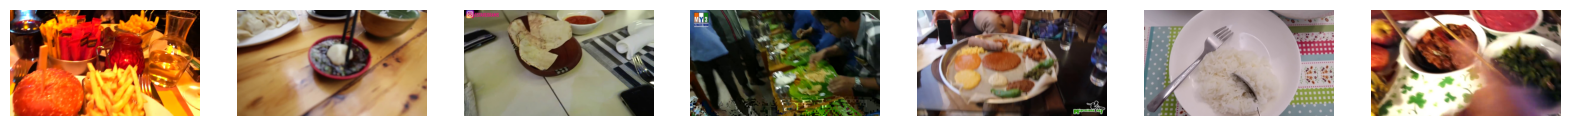

In [29]:
query=input()
clip_search(query)

woman eating
EXOTIC Vietnamese food tour! SUPER RARE street food of Hanoi Vietnam.mp4
KOREA TRAVEL VLOG - MY TRAVEL GUIDE TO JEJU & SEOUL - SPRING TIME APRIL 2017.mp4
Nepali Street Food - DEEP FRIED Snacks in Kathmandu, Nepal!.mp4
EATING VIETNAMESE FOOD IN PARIS GOURMET TOUR LOW BUDGET TRAVEL TIPS CREPES BAGUETTES FOOD BLOG.mp4


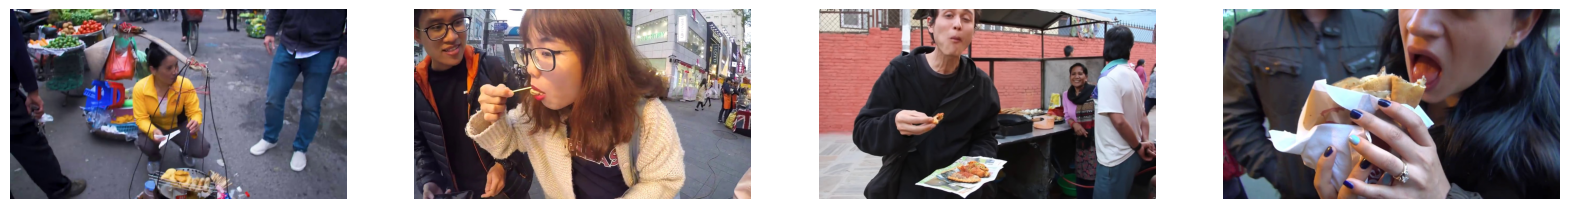

In [32]:
query=input()
clip_search(query)



france
PARIS VLOG 2018 | Trip to Paris With London College of Fashion.mp4
EATING VIETNAMESE FOOD IN PARIS GOURMET TOUR LOW BUDGET TRAVEL TIPS CREPES BAGUETTES FOOD BLOG.mp4
MI VIAJE A PARÍS | ALEXANDRA PEREIRA.mp4
EUROPEAN UNION | Study Abroad Blog | Luxembourg, Brussels & Paris by Kimberly Webber.mp4


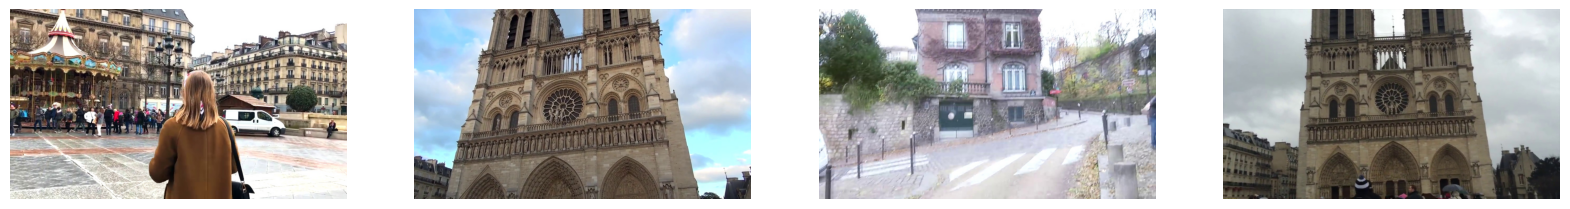

In [34]:
query=input()
clip_search(query)

india
1000₹ में 10 साड़ी खरिदे सबसे सस्ती साड़ी surat saree manufacturer urbanhill.mp4
RARE 100 STREET FOODS | RARE FOODS ALL AROUND THE WORLD | PART 1 | INDIAN STREET FOODS | street food.mp4


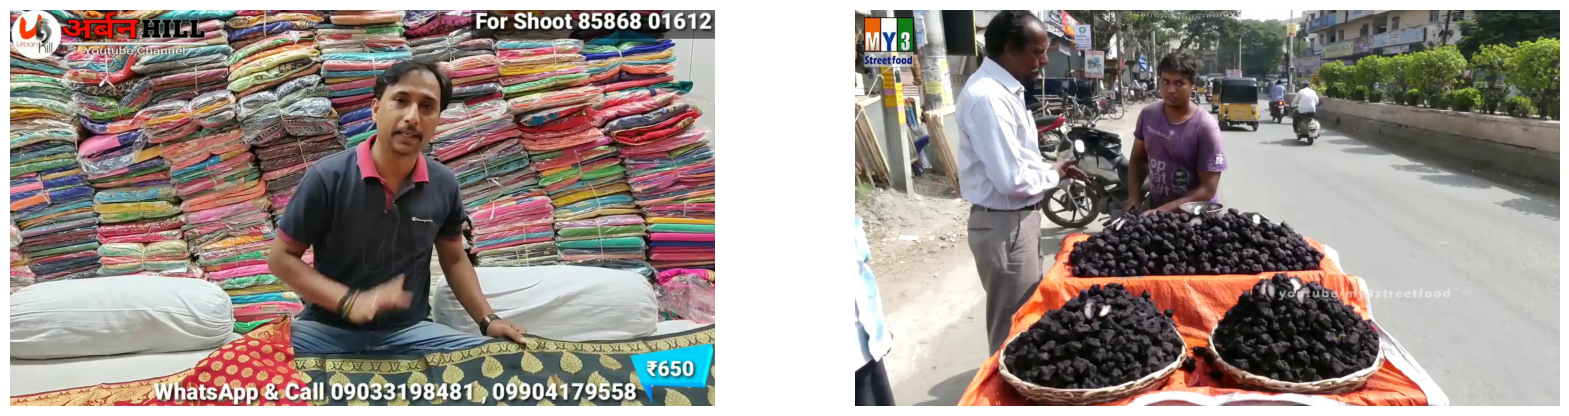

In [35]:
query=input()
clip_search(query)

In [24]:
from PIL import Image
import os
import numpy as np
import nmslib
import clip
import torch
from flask import Flask, request, jsonify

From here I tried api creation


In [25]:
app = Flask(__name__)

# Define a function to encode the query text using OpenAI's CLIP model
def encode_query_text(query):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model, preprocess = clip.load('ViT-B/32', device=device)
    text = clip.tokenize(query).to(device)
    with torch.no_grad():
        query_vector = model.encode_text(text).cpu().numpy().flatten()
    return query_vector

In [26]:
# Define a function to search for videos based on a query 
def search(query):
    video_file=[]
    videos_path = '/content/drive/MyDrive/ytvideos'
    index_path = '/content/drive/MyDrive/nms_index'
    id_map_file = '/content/drive/MyDrive/nmslib_id_map.npy'

    # Load the feature vectors index and ID mapping
    index = nmslib.init(method='hnsw', space='cosinesimil')
    index.loadIndex(index_path)
    id_map = np.load(id_map_file, allow_pickle=True).item()

    # Encode the query text using OpenAI's CLIP model
    query_vector = encode_query_text(query)

    # Query the index with the query vector
    k = 10  # number of nearest neighbors to retrieve
    neigh_ind,neigh_dist = index.knnQuery(query_vector, k=k)
    image_paths=[]
   
    freq={}
    # Retrieve the video and frame paths corresponding to the nearest neighbors
    for i in range(k):
        frame_id = id_map[neigh_ind[i]]
        video_id, frame_num = frame_id.split('_')
        if video_id not in  freq:
            freq[video_id]=1
            video_file.append(video_id)
            frame_path = os.path.join(videos_path, video_id, 'frames', frame_num)
            image_paths.append(frame_path)
   
    return video_file,image_paths

# Define a route for the API endpoint
@app.route('/api/search', methods=['POST'])
def search_videos():
    # Get the query string from the request
    query = request.json['query']

    # Call the search function to find the nearest neighbors
    video_list, image_paths = search(query)

    # Create a JSON response containing the video IDs and image paths
    response = {
        'videos': video_list,
        'images': image_paths
    }

    # Return the JSON response
    return jsonify(response)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In the above code I can't access the file because because my Flask app is running on a local server, it is able to access files located on Google Drive. I need to download the files to your local machine or to a cloud storage service that MY app can access but I don't have enough storage on my mac to currently store all these videos so need to just return the code for it 

after this code I created a new request on postman on URL http://localhost:5000/api/search 